# STP-Machathon 1.0- Solution

This is Task 1 for the Machathon Competition, The data provided is a real life Egyptian reasturants dataset that faced a team in production, Innovation solutions are required to achieve little Improvements in accuracy.

It's required to predict restaurant ratings.

Here are what the columns represent:

* user_uuid: An anonymous id unique to a given user
* restaurant_uuid: An anonymous id unique to a given Restaurant
* discounted: 1 if user had discounts upon past ordering
* area: Area where Restaurant is located
* cuisine: Tag of Food provided by the Restaurant
* restaurant_features: Features of a given Restaurant
* Ratings: The rate of a given restaurant from 1 to 5
* Id: An id unique to each row of test set, used for submission

## Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('X_train1.csv')
df

,user_uuid,restaurant_uuid,discounted,area,nOrders,cuisine,restaurant_features,Ratings
0,4f0181917069f1bf5259c04f14a944c49d461bab,bf5ee7c8457db4d32da6633baf7a047115d76af4,0,Heliopolis,1,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Gril...,5
1,06c7a3629566f04e19611981d0fb30dabe8d8daa,a8f1c42a5b27f032bbd69821b3d9941939db1ecf,0,Haram,1,['Burgers' 'Sandwiches' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Frie...,4
2,966acbc0eaf5c2cda02a242ec9caf75f98119ef9,ef29eff86405a92b1b547b32e845497694f450c6,0,Maadi,3,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Khorogat Iftar' 'Catering'],4
3,a910926f38c18c2e00a338c7d2f6e03ee78ea7a4,66ae2fbb6d1dfc1d3b07a68839db5da163eabe68,0,Faisal,1,['Pizza' 'Fast Food'],['24 hrs'],1
4,aa25b862b3f7fbd71425170343c53dcd93ec10c9,ef29eff86405a92b1b547b32e845497694f450c6,0,Maadi,1,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Khorogat Iftar' 'Catering'],4
...,...,...,...,...,...,...,...,...
79390,03406503f7701dc5fde1887170f13aac4d75d333,c2e51bf525d2b2c7a33c3d8ee017914c6400e975,0,Nasr City,3,['Egyptian' 'Fast Food'],['No Smoking Area'],5
79391,da8d4dbcf05a79f452f24494e4375f0c768a0d13,5f05a1ca558b36c593f2ab9f552f7fadbed9c383,0,Heliopolis,1,['Asian' 'Japanese' 'Sushi' 'Steaks'],['No Smoking Area' 'Casual Dining' 'Outdoor' '...,5
79392,0fcd18e59f31106fd855b6cf340bf00bde6d6f99,c2e51bf525d2b2c7a33c3d8ee017914c6400e975,1,Maadi,2,['Egyptian' 'Fast Food'],['No Smoking Area'],5
79393,cf77a30aa4de6e8dfc940ddea222a84766de925f,bf5ee7c8457db4d32da6633baf7a047115d76af4,0,New Cairo,3,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Gril...,4


In [3]:
df['restaurant_features'].describe()

count                                                 79395
unique                                                  225
top       ['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Frie...
freq                                                  12016
Name: restaurant_features, dtype: object

In [4]:
#alot of unique data, let's explore it
df['restaurant_features'].unique()

array(["['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Grill' 'Catering']",
       "['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Friendly' 'Playground' '24 hrs']",
       "['No Smoking Area' 'Khorogat Iftar' 'Catering']", "['24 hrs']",
       "['Khorogat Iftar']",
       "['No Smoking Area' 'Breakfast' 'Work Or Study' 'Coffeeshops']",
       "['No Smoking Area' 'TV' 'WiFi']", "['No Smoking Area']",
       "['Outdoor']",
       "['Outdoor' 'TV' 'Breakfast' 'Sohour w Khorouga' 'Catering' 'Cheap Eats']",
       "['Outdoor' '24 hrs']", "['Outdoor' 'Catering']",
       "['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Khorogat Iftar']",
       "['Outdoor' 'Khorogat Iftar' 'Catering']",
       "['No Smoking Area' 'Casual Dining' 'Outdoor']",
       "['No Smoking Area' 'Casual Dining' 'Outdoor' 'Catering']",
       "['No Smoking Area' 'WiFi' 'Cheap Eats']",
       "['Outdoor' 'TV' 'Drive-ins' 'Cheap Eats']",
       "['Outdoor' 'Drive-ins' 'Catering' 'Cheap Eats']",
       "['No Smoking Area' 'Outdoor' 'TV' 

In [5]:
df['cuisine'].unique()

array(["['Egyptian' 'Oriental' 'Grill']",
       "['Burgers' 'Sandwiches' 'Fast Food']", "['Pizza' 'Fast Food']",
       "['Pizza' 'Oriental' 'Sandwiches' 'Grill']",
       "['Sandwiches' 'Bakeries and Pastries']", "['Fast Food']",
       "['Egyptian' 'Sandwiches']",
       "['Egyptian' 'Oriental' 'Foul we Ta3meya']",
       "['Pizza' 'Egyptian']", "['Bakeries and Pastries' 'Desserts']",
       "['Fast Food' 'Chicken']", "['Oriental']", "['Grill' 'Syrian']",
       "['Burgers' 'Sandwiches']", "['International']",
       "['Egyptian' 'Fast Food']",
       "['Oriental' 'Sandwiches' 'Fast Food' 'Vegetarian']",
       "['Egyptian' 'Koshary']", "['Sandwiches' 'Fast Food' 'Grill']",
       "['Oriental' 'Syrian']", "['Sandwiches' 'Fast Food' 'Syrian']",
       "['German' 'Chicken']", "['Burgers' 'Sandwiches' 'Chicken']",
       "['Sandwiches' 'Syrian']",
       "['Egyptian' 'Sandwiches' 'Koshary' 'Foul we Ta3meya']",
       "['Pizza']", "['Pizza' 'American']", "['Oriental' 'Grill']",
       "

## Preprocessing

**1. Precess restaurant_features col**

In [6]:
# Cleaning cols

df['restaurant_features']=[df['restaurant_features'][i].replace("\n ", " ") for i in range(df['restaurant_features'].count())]
df['restaurant_features']=[df['restaurant_features'][i].replace("], dtype=object))", "") for i in range(df['restaurant_features'].count())]
df['restaurant_features']=[df['restaurant_features'][i].replace(r"array([", "") for i in range(df['restaurant_features'].count())]
df['restaurant_features']=[df['restaurant_features'][i].replace(r"],      dtype=object)", "") for i in range(df['restaurant_features'].count())]
df['restaurant_features']=[df['restaurant_features'][i].replace(r"], dtype=object)", "") for i in range(df['restaurant_features'].count())]
df['restaurant_features']=[df['restaurant_features'][i].replace(r"       ", "") for i in range(df['restaurant_features'].count())]

# Replace comma with space
df['restaurant_features']=[df['restaurant_features'][i].replace(r", ", " ") for i in range(df['restaurant_features'].count())]
df['restaurant_features']=[df['restaurant_features'][i].replace(r',', " ") for i in range(df['restaurant_features'].count())]


In [7]:
df['resFeatures'] = [df['restaurant_features'][i].split("' '") for i in range(df['restaurant_features'].count())]
for i in range(df['resFeatures'].count()):
    df['resFeatures'][i][0] = df['resFeatures'][i][0].strip("['")
    df['resFeatures'][i][-1] = df['resFeatures'][i][-1].strip("']")

In [8]:
#making list of featuers
df['resFeatures'] = [df['restaurant_features'][i].split("' '") for i in range(df['restaurant_features'].count())]
for i in range(df['resFeatures'].count()):
    df['resFeatures'][i][0] = df['resFeatures'][i][0].strip("['")
    df['resFeatures'][i][-1] = df['resFeatures'][i][-1].strip("']")
df['resFeatures']

0        [No Smoking Area, Outdoor, TV, WiFi, Grill, Ca...
1        [No Smoking Area, Outdoor, WiFi, Kids-Friendly...
2              [No Smoking Area, Khorogat Iftar, Catering]
3                                                 [24 hrs]
4              [No Smoking Area, Khorogat Iftar, Catering]
                               ...                        
79390                                    [No Smoking Area]
79391    [No Smoking Area, Casual Dining, Outdoor, WiFi...
79392                                    [No Smoking Area]
79393    [No Smoking Area, Outdoor, TV, WiFi, Grill, Ca...
79394    [No Smoking Area, Outdoor, TV, WiFi, Grill, Ca...
Name: resFeatures, Length: 79395, dtype: object

In [9]:
# Encoding MultiLabel data using MultiLabel Binarizer 
from sklearn.preprocessing import MultiLabelBinarizer

multilabelbinarizer = MultiLabelBinarizer()
multilabel_encoded_results = multilabelbinarizer.fit_transform(df['resFeatures'])
# Classes created in MultiLabel data after Encoding
multilabelbinarizer.classes_

array(['24 hrs', 'Alcohol', 'Breakfast', 'Breakfast in Sahel',
       'Casual Dining', 'Catering', 'Cheap Eats', 'Coffee Places',
       'Coffeeshops', 'Drive-ins', 'Fancy Dining', 'Food with a View',
       'Grill', 'Hidden Gems', 'Iftar', 'Iftar Open Buffet',
       'Khorogat Iftar', 'Kids-Friendly', 'Live Music', 'Nile/Sea View',
       'No Smoking Area', 'Open During Day', 'Outdoor', 'Pet Friendly',
       'Playground', 'Post Fetar Hangouts', 'Pride of Alex',
       'Ramadan Fel Hussein', 'Ramadan Tents', 'Romantic', 'Shisha',
       'Sohour w Khorouga', 'Sokhna Seafood', 'Street Food', 'TV', 'WiFi',
       'Work Or Study'], dtype=object)

**2. process cusine col**

In [10]:
# Cleaning cols
df['cuisine']=[df['cuisine'][i].replace("\n ", " ") for i in range(df['cuisine'].count())]
df['cuisine']=[df['cuisine'][i].replace("], dtype=object))", "") for i in range(df['cuisine'].count())]
df['cuisine']=[df['cuisine'][i].replace(r"array([", "") for i in range(df['cuisine'].count())]
df['cuisine']=[df['cuisine'][i].replace(r"],      dtype=object)", "") for i in range(df['cuisine'].count())]
df['cuisine']=[df['cuisine'][i].replace(r"], dtype=object)", "") for i in range(df['cuisine'].count())]
df['cuisine']=[df['cuisine'][i].replace(r"       ", "") for i in range(df['cuisine'].count())]

# Replace comma with space
df['cuisine']=[df['cuisine'][i].replace(r", ", " ") for i in range(df['cuisine'].count())]
df['cuisine']=[df['cuisine'][i].replace(r',', " ") for i in range(df['cuisine'].count())]


df['resCuisine'] = [df['cuisine'][i].split("' '") for i in range(df['cuisine'].count())]
for i in range(df['resCuisine'].count()):
    df['resCuisine'][i][0] = df['resCuisine'][i][0].strip("['")
    df['resCuisine'][i][-1] = df['resCuisine'][i][-1].strip("']")

In [11]:
binCuisine = MultiLabelBinarizer()
multilabel_encoded_results2 = binCuisine.fit_transform(df['resCuisine'])
# Classes created in MultiLabel data after Encoding
binCuisine.classes_

array(['American', 'Argentinian', 'Asian', 'Bakeries and Pastries',
       'Burgers', 'Chicken', 'Chinese', 'Coffee & Drinks', 'Desserts',
       'Egyptian', 'European', 'Fast Food', 'Foul we Ta3meya', 'French',
       'German', 'Grill', 'Indian', 'International', 'Italian',
       'Japanese', 'Koshary', 'Lebanese', 'Mexican', 'Oriental', 'Pizza',
       'Sandwiches', 'Seafood', 'Spanish', 'Steaks', 'Sushi', 'Syrian',
       'Tarts and chocolates', 'Tex-Mex', 'Thai', 'Turkish', 'Vegetarian'],
      dtype=object)

### Data visualization

<AxesSubplot:xlabel='area', ylabel='Ratings'>

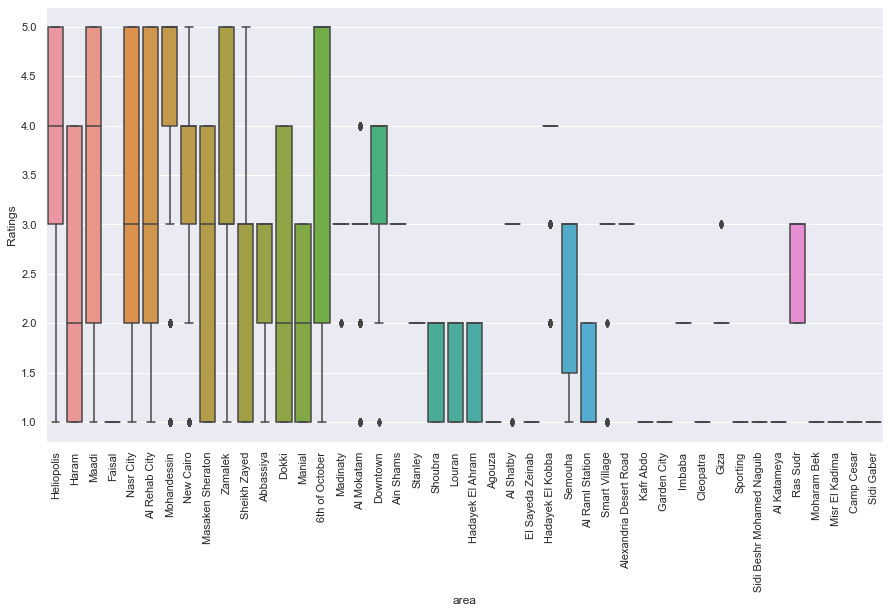

In [12]:
# areas of best resturants
sns.set(rc = {'figure.figsize':(15,8)})
ax=sns.boxplot(x="area", y="Ratings", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

<AxesSubplot:>

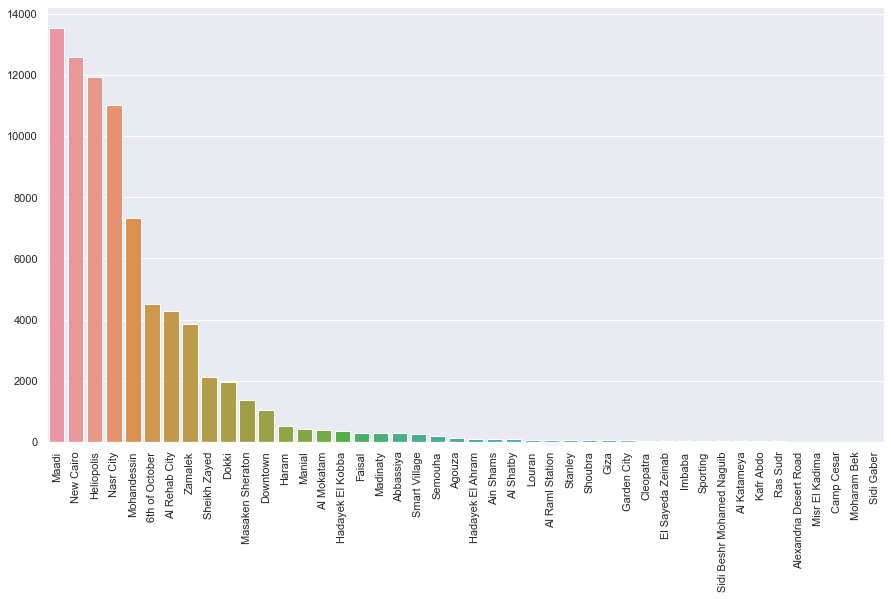

In [13]:
# Area-RestaurantCount distribution
sns.set(rc = {'figure.figsize':(15,8)})
ax=sns.barplot(x=list(df['area'].value_counts().keys()), y=list(df['area'].value_counts()), data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

**3. Extract features from area**

In [14]:
area = df['area']
area_numerical = pd.get_dummies(area)
area_numerical

,6th of October,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,Al Shatby,Alexandria Desert Road,...,Ras Sudr,Semouha,Sheikh Zayed,Shoubra,Sidi Beshr Mohamed Naguib,Sidi Gaber,Smart Village,Sporting,Stanley,Zamalek
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Display resturant features

# Converting an Numpy Array into a pandas dataframe
df_multilabel_data = pd.DataFrame(multilabel_encoded_results, columns=multilabelbinarizer.classes_)
# Viewing few rows of data
df_multilabel_data.head()

,24 hrs,Alcohol,Breakfast,Breakfast in Sahel,Casual Dining,Catering,Cheap Eats,Coffee Places,Coffeeshops,Drive-ins,...,Ramadan Fel Hussein,Ramadan Tents,Romantic,Shisha,Sohour w Khorouga,Sokhna Seafood,Street Food,TV,WiFi,Work Or Study
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df[area_numerical.columns] = area_numerical
df[multilabelbinarizer.classes_] = multilabel_encoded_results
df[binCuisine.classes_] = multilabel_encoded_results2
df

C:\Users\dinak\anaconda3\lib\site-packages\pandas\core\frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


,user_uuid,restaurant_uuid,discounted,area,nOrders,cuisine,restaurant_features,Ratings,resFeatures,resCuisine,...,Seafood,Spanish,Steaks,Sushi,Syrian,Tarts and chocolates,Tex-Mex,Thai,Turkish,Vegetarian
0,4f0181917069f1bf5259c04f14a944c49d461bab,bf5ee7c8457db4d32da6633baf7a047115d76af4,0,Heliopolis,1,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Gril...,5,"[No Smoking Area, Outdoor, TV, WiFi, Grill, Ca...","[Egyptian, Oriental, Grill]",...,0,0,0,0,0,0,0,0,0,0
1,06c7a3629566f04e19611981d0fb30dabe8d8daa,a8f1c42a5b27f032bbd69821b3d9941939db1ecf,0,Haram,1,['Burgers' 'Sandwiches' 'Fast Food'],['No Smoking Area' 'Outdoor' 'WiFi' 'Kids-Frie...,4,"[No Smoking Area, Outdoor, WiFi, Kids-Friendly...","[Burgers, Sandwiches, Fast Food]",...,0,0,0,0,0,0,0,0,0,0
2,966acbc0eaf5c2cda02a242ec9caf75f98119ef9,ef29eff86405a92b1b547b32e845497694f450c6,0,Maadi,3,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Khorogat Iftar' 'Catering'],4,"[No Smoking Area, Khorogat Iftar, Catering]","[Egyptian, Oriental, Grill]",...,0,0,0,0,0,0,0,0,0,0
3,a910926f38c18c2e00a338c7d2f6e03ee78ea7a4,66ae2fbb6d1dfc1d3b07a68839db5da163eabe68,0,Faisal,1,['Pizza' 'Fast Food'],['24 hrs'],1,[24 hrs],"[Pizza, Fast Food]",...,0,0,0,0,0,0,0,0,0,0
4,aa25b862b3f7fbd71425170343c53dcd93ec10c9,ef29eff86405a92b1b547b32e845497694f450c6,0,Maadi,1,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Khorogat Iftar' 'Catering'],4,"[No Smoking Area, Khorogat Iftar, Catering]","[Egyptian, Oriental, Grill]",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79390,03406503f7701dc5fde1887170f13aac4d75d333,c2e51bf525d2b2c7a33c3d8ee017914c6400e975,0,Nasr City,3,['Egyptian' 'Fast Food'],['No Smoking Area'],5,[No Smoking Area],"[Egyptian, Fast Food]",...,0,0,0,0,0,0,0,0,0,0
79391,da8d4dbcf05a79f452f24494e4375f0c768a0d13,5f05a1ca558b36c593f2ab9f552f7fadbed9c383,0,Heliopolis,1,['Asian' 'Japanese' 'Sushi' 'Steaks'],['No Smoking Area' 'Casual Dining' 'Outdoor' '...,5,"[No Smoking Area, Casual Dining, Outdoor, WiFi...","[Asian, Japanese, Sushi, Steaks]",...,0,0,1,1,0,0,0,0,0,0
79392,0fcd18e59f31106fd855b6cf340bf00bde6d6f99,c2e51bf525d2b2c7a33c3d8ee017914c6400e975,1,Maadi,2,['Egyptian' 'Fast Food'],['No Smoking Area'],5,[No Smoking Area],"[Egyptian, Fast Food]",...,0,0,0,0,0,0,0,0,0,0
79393,cf77a30aa4de6e8dfc940ddea222a84766de925f,bf5ee7c8457db4d32da6633baf7a047115d76af4,0,New Cairo,3,['Egyptian' 'Oriental' 'Grill'],['No Smoking Area' 'Outdoor' 'TV' 'WiFi' 'Gril...,4,"[No Smoking Area, Outdoor, TV, WiFi, Grill, Ca...","[Egyptian, Oriental, Grill]",...,0,0,0,0,0,0,0,0,0,0


In [17]:
#drop old cols
df.drop(columns=['area','user_uuid','restaurant_uuid','cuisine','restaurant_features','resCuisine','resFeatures'], inplace=True)
df

,discounted,nOrders,Ratings,6th of October,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,...,Seafood,Spanish,Steaks,Sushi,Syrian,Tarts and chocolates,Tex-Mex,Thai,Turkish,Vegetarian
0,0,1,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79390,0,3,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79391,0,1,5,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
79392,1,2,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79393,0,3,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y=df['Ratings']
df.drop(['Ratings'],axis=1,inplace=True)
df['Ratings']=y
df

,discounted,nOrders,6th of October,Abbassiya,Agouza,Ain Shams,Al Katameya,Al Mokatam,Al Raml Station,Al Rehab City,...,Spanish,Steaks,Sushi,Syrian,Tarts and chocolates,Tex-Mex,Thai,Turkish,Vegetarian,Ratings
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79390,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
79391,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,5
79392,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
79393,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


## Building the model

In [19]:
from sklearn import svm
clf = svm.SVC()

In [20]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [21]:
clf.fit(x_train,y_train)

SVC()

In [22]:
#Import accoracy metrics
from sklearn.metrics import r2_score as er
y_predict = clf.predict(x_test)

er(y_test, y_predict)

0.9894627673719169

In [23]:
#build model using Random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier( random_state=0)
clf2.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [24]:
y_predict2 = clf2.predict(x_test)

er(y_test, y_predict2)

0.9963313309998937